In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_tesla = pd.read_csv('../data/Google/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('../data/Google/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('../data/Google/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('../data/Google/UE Benefits Search vs UE Rate 2004-19.csv')

In [3]:
df_btc_price.shape

(2204, 3)

In [4]:
# this is daily data
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [5]:
df_btc_price.columns

Index(['DATE', 'CLOSE', 'VOLUME'], dtype='object')

In [6]:
df_btc_price['CLOSE'].max()

19497.400391

In [7]:
print(f"the highest ever BTC close in the dataset is {df_btc_price['CLOSE'].max()}")

the highest ever BTC close in the dataset is 19497.400391


In [8]:
# search rank is the relative rank (0-100) of search in a given region and time

In [9]:
df_btc_price.dropna(inplace=True)
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [10]:
# any is afunction to search if there are any instances of another function
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')

Missing values for Tesla?: False


In [11]:
print(f'Missing values for BTC?: {df_btc_price.isna().values.any()}')

Missing values for BTC?: False


In [12]:
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)

In [13]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)

In [14]:
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)

In [15]:
# confirming it is a datetime character
df_tesla.describe

<bound method NDFrame.describe of          MONTH  TSLA_WEB_SEARCH  TSLA_USD_CLOSE
0   2010-06-01                3        4.766000
1   2010-07-01                3        3.988000
2   2010-08-01                2        3.896000
3   2010-09-01                2        4.082000
4   2010-10-01                2        4.368000
..         ...              ...             ...
119 2020-05-01               16      167.000000
120 2020-06-01               17      215.962006
121 2020-07-01               24      286.152008
122 2020-08-01               23      498.320007
123 2020-09-01               31      407.339996

[124 rows x 3 columns]>

In [16]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [17]:
df_btc_monthly = df_btc_price.resample('M',on='DATE').last()
df_btc_monthly.shape

(73, 3)

In [18]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


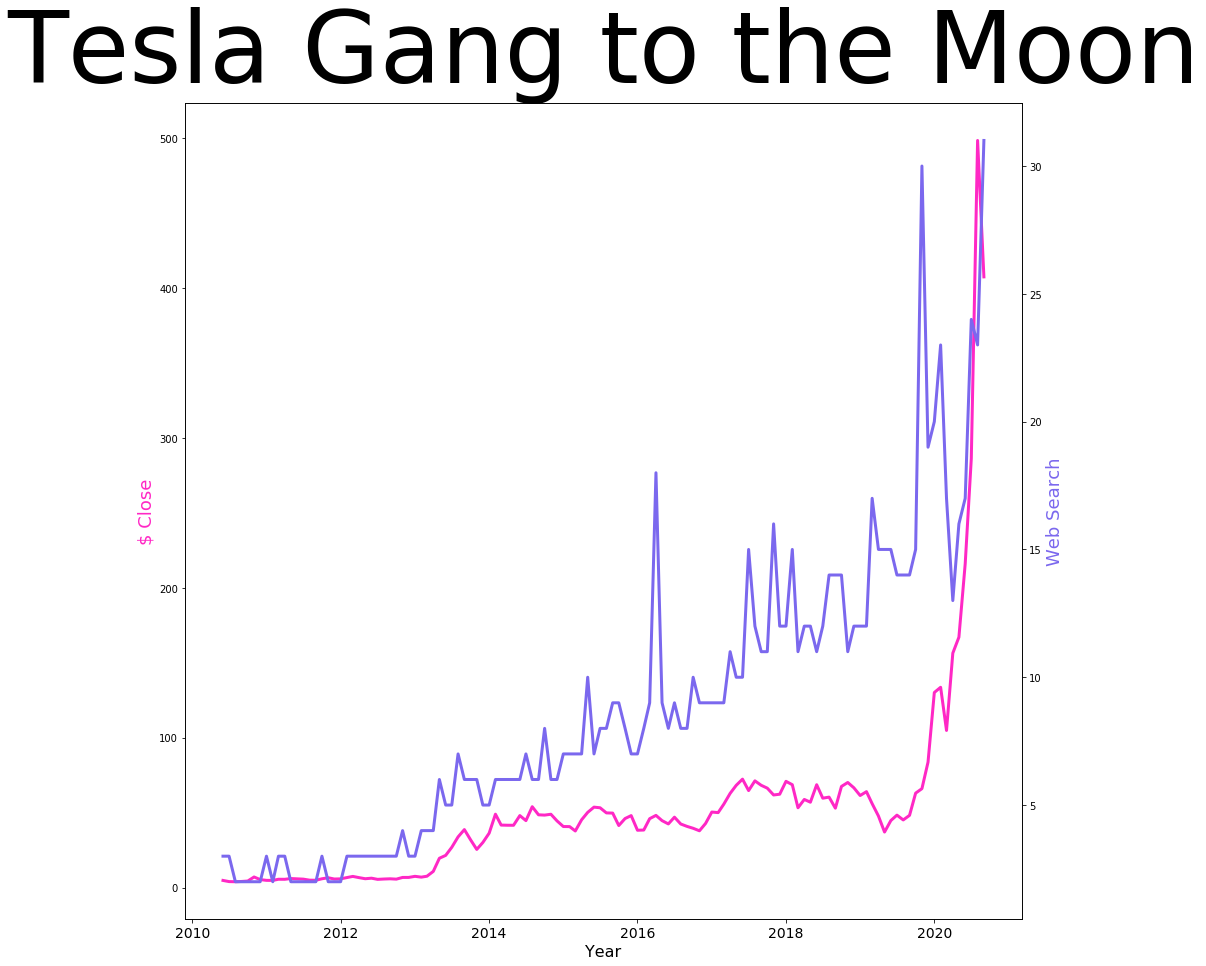

In [21]:
# colors https://matplotlib.org/3.1.1/gallery/color/named_colors.html
plt.figure(figsize=(15,15))
plt.xlabel('Year',fontsize=16)
plt.xticks(fontsize=14)
plt.title('Tesla Gang to the Moon', fontsize=100)
ax1 = plt.gca()
ax2 = plt.twinx()



ax1.set_ylabel('$ Close',color='#FF28C5',fontsize=18)
ax2.set_ylabel('Web Search',color='mediumslateblue',fontsize=18)


ax1.plot(df_tesla.MONTH,df_tesla.TSLA_USD_CLOSE, COLOR='#FF28C5',linewidth=3)
ax2.plot(df_tesla.MONTH,df_tesla.TSLA_WEB_SEARCH, color='mediumslateblue',linewidth=3)
plt.show() # just allows to to chart without Jupyter doing it for us

In [22]:
import matplotlib.dates as mdates

In [24]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
year_fmt = mdates.DateFormatter('%Y')

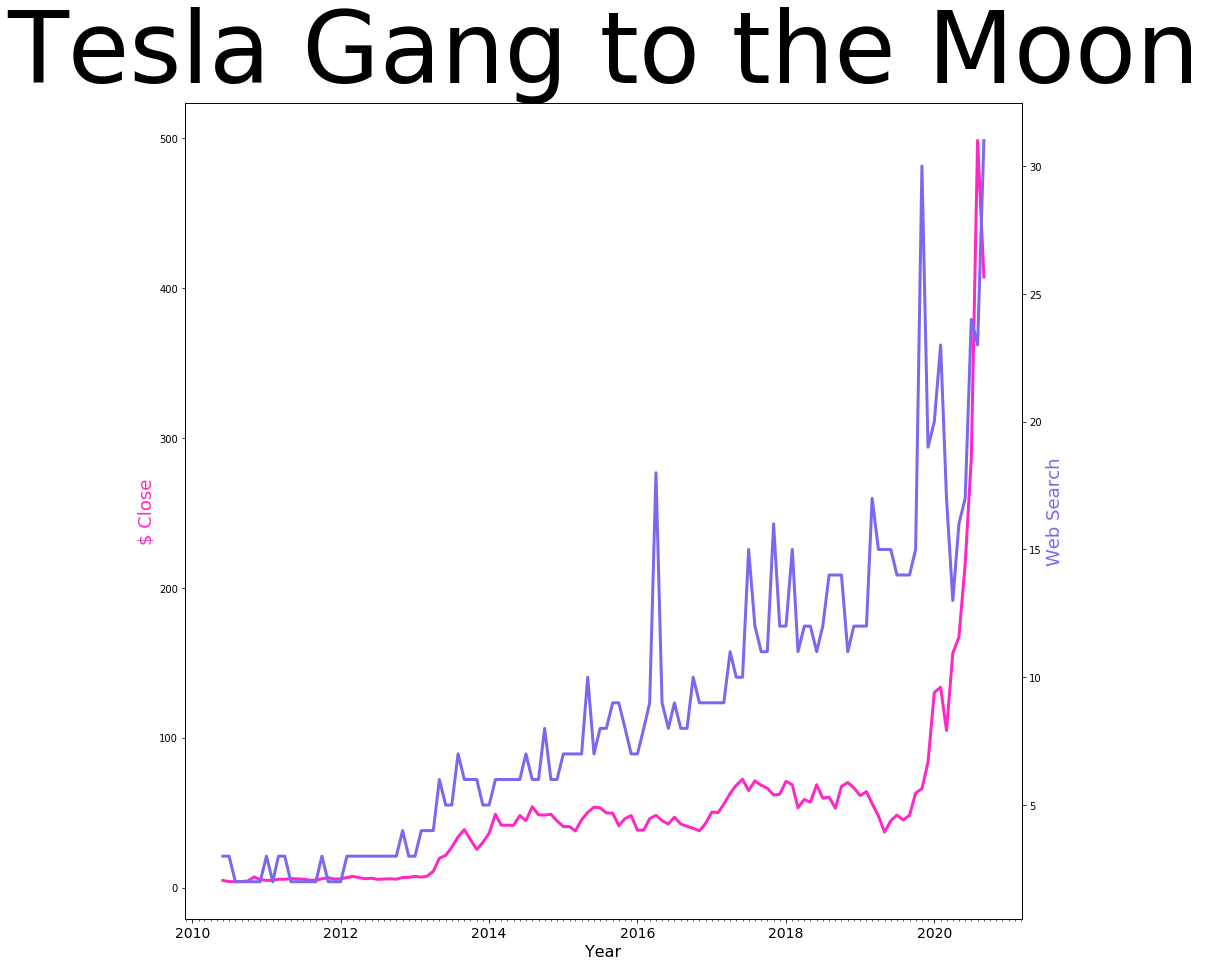

In [28]:
# colors https://matplotlib.org/3.1.1/gallery/color/named_colors.html
plt.figure(figsize=(15,15))
plt.xlabel('Year',fontsize=16)
plt.xticks(fontsize=14)
plt.title('Tesla Gang to the Moon', fontsize=100)
ax1 = plt.gca()
ax2 = plt.twinx()

# setting tick marks using the built in functions in MatPlotLib
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(months)



ax1.set_ylabel('$ Close',color='#FF28C5',fontsize=18)
ax2.set_ylabel('Web Search',color='mediumslateblue',fontsize=18)


ax1.plot(df_tesla.MONTH,df_tesla.TSLA_USD_CLOSE, COLOR='#FF28C5',linewidth=3)
ax2.plot(df_tesla.MONTH,df_tesla.TSLA_WEB_SEARCH, color='mediumslateblue',linewidth=3)
plt.show() # just allows to to chart without Jupyter doing it for us

In [29]:
df_btc_monthly.head()

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


In [30]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09-01,5
1,2014-10-01,4
2,2014-11-01,4
3,2014-12-01,4
4,2015-01-01,5


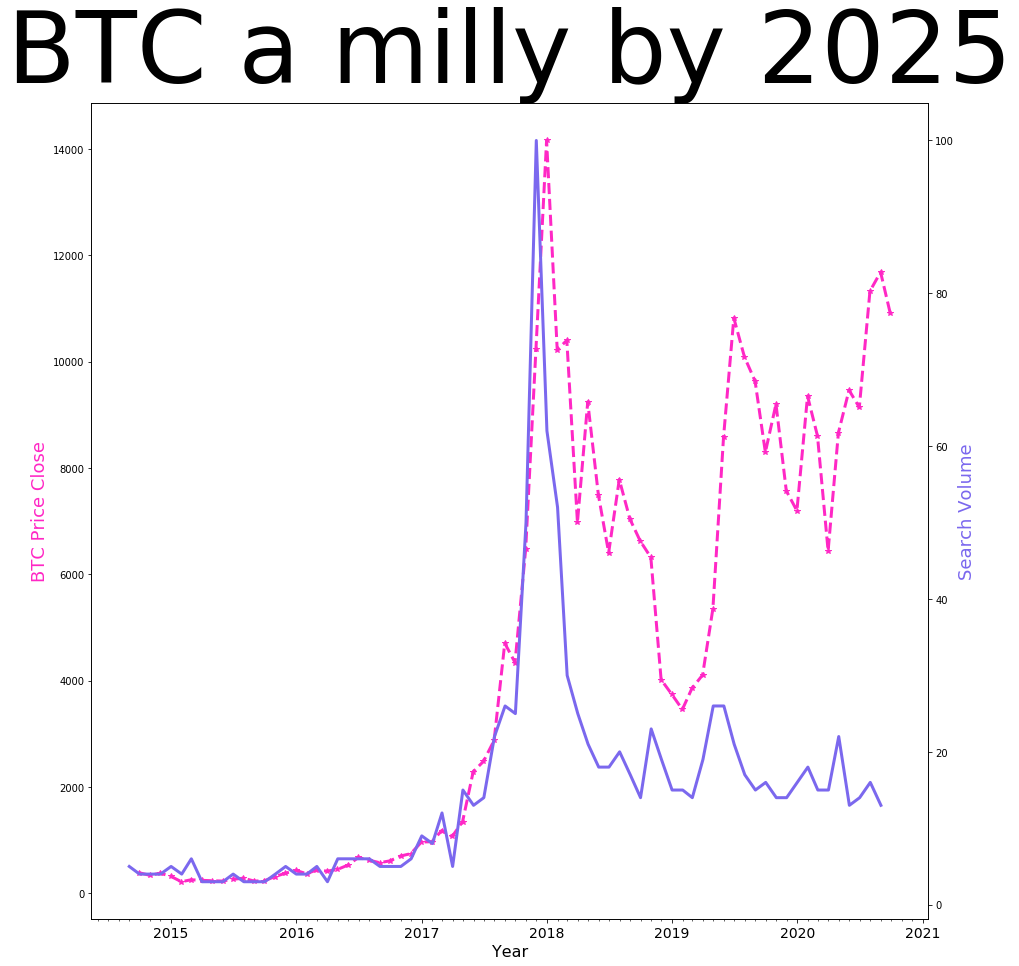

In [44]:
# colors https://matplotlib.org/3.1.1/gallery/color/named_colors.html
plt.figure(figsize=(15,15))
plt.xlabel('Year',fontsize=16)
plt.xticks(fontsize=14)

plt.title('BTC a milly by 2025', fontsize=100)
ax1 = plt.gca()
ax2 = plt.twinx()

# setting tick marks using the built in functions in MatPlotLib
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(months)
#ax1.set_xlim([df_btc_monthly.index.min(),df_btc_monthly.index.max()])


ax1.set_ylabel('BTC Price Close',color='#FF28C5',fontsize=18)
ax2.set_ylabel('Search Volume',color='mediumslateblue',fontsize=18)

# plotting the bitcoin price (resampled to get monthly) against search volume
ax1.plot(df_btc_monthly.DATE,df_btc_monthly.CLOSE, COLOR='#FF28C5',linewidth=3,marker='*',linestyle='dashed')
ax2.plot(df_btc_search.MONTH,df_btc_search.BTC_NEWS_SEARCH, color='mediumslateblue',linewidth=3)
plt.show() # just allows to to chart without Jupyter doing it for us

In [46]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


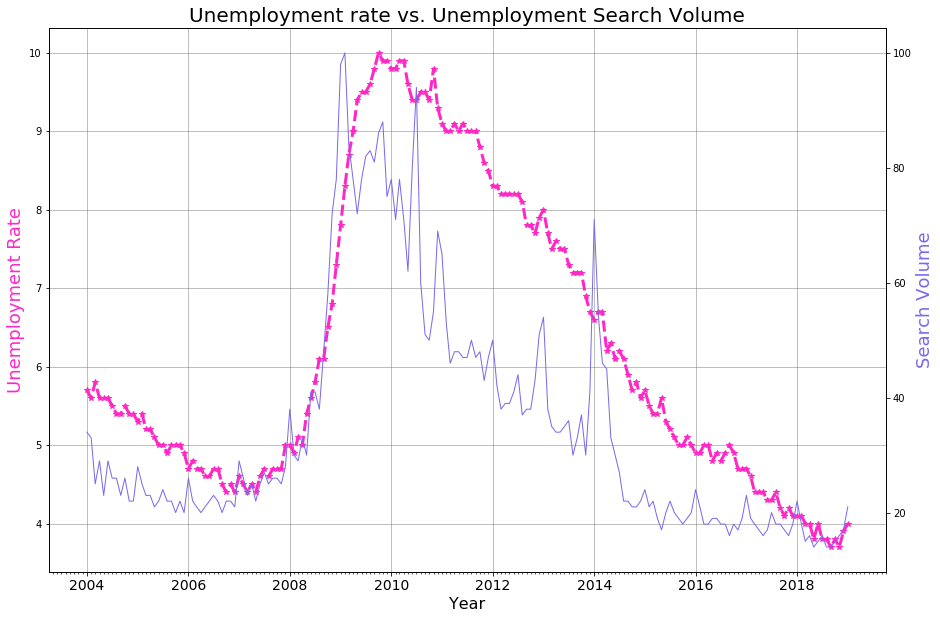

In [62]:
# colors https://matplotlib.org/3.1.1/gallery/color/named_colors.html
plt.figure(figsize=(15,10))
plt.xlabel('Year',fontsize=16)
plt.xticks(fontsize=14)

plt.title('Unemployment rate vs. Unemployment Search Volume', fontsize=20)
ax1 = plt.gca()
ax2 = plt.twinx()

# setting tick marks using the built in functions in MatPlotLib
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(months)
#ax1.set_xlim([df_btc_monthly.index.min(),df_btc_monthly.index.max()])


ax1.set_ylabel('Unemployment Rate',color='#FF28C5',fontsize=18)
ax2.set_ylabel('Search Volume',color='mediumslateblue',fontsize=18)

ax1.grid(bool,which='major',axis='both',color='grey',linewidth=0.5)

# plotting the bitcoin price (resampled to get monthly) against search volume
ax1.plot(df_unemployment.MONTH,df_unemployment.UNRATE, COLOR='#FF28C5',linewidth=3,marker='*',linestyle='dashed')
ax2.plot(df_unemployment.MONTH,df_unemployment.UE_BENEFITS_WEB_SEARCH, color='mediumslateblue',linewidth=1)
plt.show() # just allows to to chart without Jupyter doing it for us

In [70]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


In [69]:
# this is basically a window function, the equivalent of sum over(rows blah blah blah order by blah)
df_roll = df_unemployment.rolling(6).mean()
df_roll.head(10)

,UE_BENEFITS_WEB_SEARCH,UNRATE
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,28.833333,5.650000
6,27.500000,5.616667
7,26.333333,5.583333
8,26.000000,5.516667
9,25.500000,5.500000


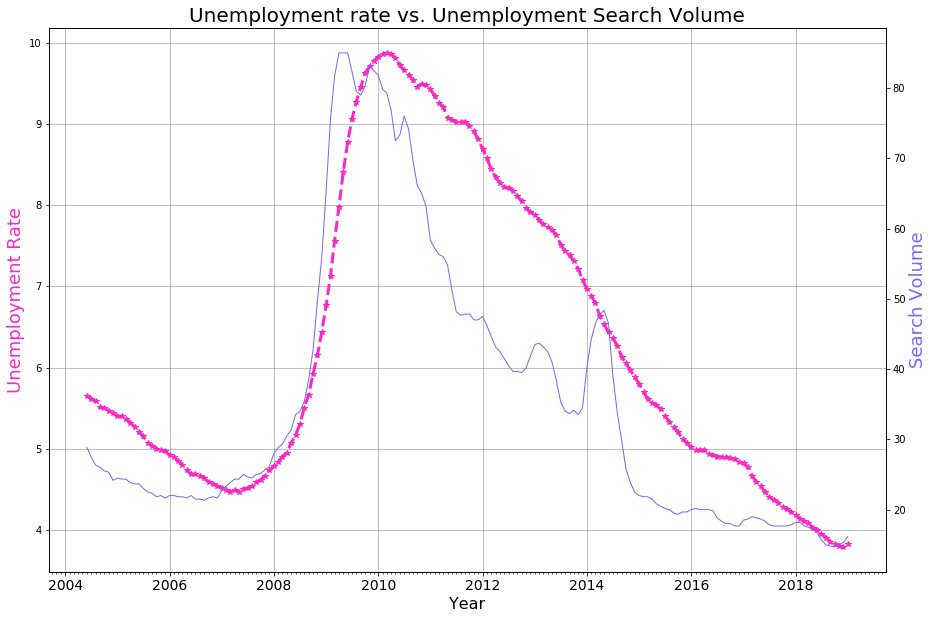

In [71]:
# get a 6 month rolling average
plt.figure(figsize=(15,10))
plt.xlabel('Year',fontsize=16)
plt.xticks(fontsize=14)

plt.title('Unemployment rate vs. Unemployment Search Volume', fontsize=20)
ax1 = plt.gca()
ax2 = plt.twinx()

# setting tick marks using the built in functions in MatPlotLib
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(months)
#ax1.set_xlim([df_btc_monthly.index.min(),df_btc_monthly.index.max()])


ax1.set_ylabel('Unemployment Rate',color='#FF28C5',fontsize=18)
ax2.set_ylabel('Search Volume',color='mediumslateblue',fontsize=18)

ax1.grid(bool,which='major',axis='both',color='grey',linewidth=0.5)

# you can plot xaxis from the original DataFrame, and then the rolling y axis from the new DataFrame
ax1.plot(df_unemployment.MONTH,df_roll.UNRATE, COLOR='#FF28C5',linewidth=3,marker='*',linestyle='dashed')
ax2.plot(df_unemployment.MONTH,df_roll.UE_BENEFITS_WEB_SEARCH, color='mediumslateblue',linewidth=1)
plt.show() # just allows to to chart without Jupyter doing it for us

### Create a new DateFrame for the rolling averages.
#### When you plot, use the original x axis (months) and then new y axis in the just-made DataFrame

In [75]:
df_crash = pd.read_csv('../data/Google/UE Benefits Search vs UE Rate 2004-20.csv')
df_crash.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [77]:
df_crash.MONTH = pd.to_datetime(df_crash.MONTH)

In [78]:
print(f'Missing values for BTC?: {df_crash.isna().values.any()}')

Missing values for BTC?: False


In [80]:
df_crash.isna().any()

MONTH                     False
UE_BENEFITS_WEB_SEARCH    False
UNRATE                    False
dtype: bool

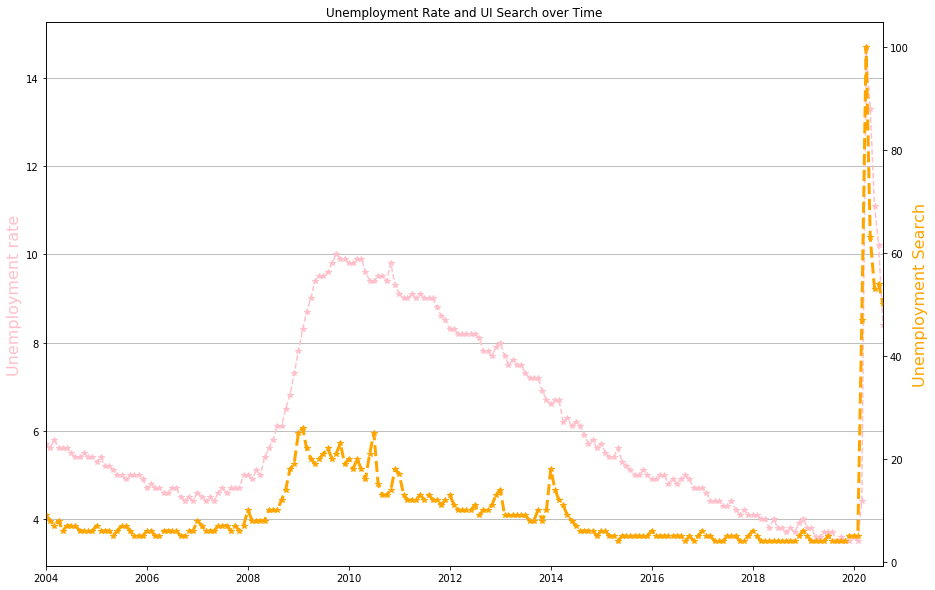

In [98]:
plt.figure(figsize=(15,10))

ax1 = plt.gca()
ax2 = plt.twinx()
ax1.set_title('Unemployment Rate and UI Search over Time')
ax1.plot(df_crash.MONTH,df_crash.UNRATE,color='pink',linestyle='--',marker='*')
ax1.set_ylabel('Unemployment rate',fontsize=16,color='pink')
ax1.grid(bool,axis='y')
ax1.set_xlim([df_crash.MONTH.min(),df_crash.MONTH.max()])

ax2.plot(df_crash.MONTH,df_crash.UE_BENEFITS_WEB_SEARCH,color='orange',linestyle='--',marker='*',linewidth=3)
ax2.set_ylabel('Unemployment Search',fontsize=16,color='orange')

plt.show()

# they are related although Unemployment rate has a larger amplitude of spike

###### *do everything with the custom axis -- easier to manipulate and have more control*